# One more data analysis about coronavirus, but normalized...
Data provided by https://github.com/CSSEGISandData/COVID-19

### Comments
I coded this in order to follow figures about covid, for curiosity, without any goal else.

It would be very useful and interesting to know :
* the number of tests in each country (maybe the confirmed rate is underestimated) ;
* the fiability of figures of death (countries may hide some death).

I am not a data scientist, thanks for any tip you can give me to improve this code.

Take care,

Yann Marsaud

In [24]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Functions to clean and prepare data

In [25]:
## returns a dataframe with the sum of cases for the country_str from the data source src_data
## Country/Region is the new index of this dataframe (=country_str)
def sum_cases(src_data,country_str):
    multi = src_data[src_data["Country/Region"] == country_str]
    multi = multi.groupby(multi["Country/Region"]).sum()
    return multi

## Returns a dataframe with the selected 'countries' and the 'countries_group' 
 # (countries with more than one province)  
 # Index of the returned dataframe : 'Country/Region'
def prepare_data(data,countries,countries_group):
    # Loads data from countries ignoring provinces
    data_selected = data[data["Country/Region"].isin(countries) & data["Province/State"].isnull() ]
    data_selected = data_selected.set_index('Country/Region')
    # Agregates country with provinces in the final result
    for c in countries_group:
        data_selected = pd.concat([sum_cases(data,c),data_selected])
    # deleting useless fields
    data_selected = data_selected.drop(["Province/State"],axis=1) 
    # merge data with country names
    data_selected = data_selected.join(population.set_index('Country/Region'))
    return data_selected

# Returns data normalized to convert data for 10^n inhabitants and transposed
# Deletes the field Population
def normalize_and_timeserie(data_selected,n):
    data_norm = data_selected.copy()
    data_norm["Population"] = data_norm["Population"] / 10**n
    data_norm = data_norm.div(data_norm["Population"],axis=0)
    data_norm = data_norm.drop(["Population"],axis=1)
    data_norm = data_norm.transpose()
    data_norm.index = pd.to_datetime(data_norm.index)
    return data_norm
# Basis of normalization : for 10**n inhabitants
n = 7
# Path of data
path = '../csse_covid_19_data/csse_covid_19_time_series/'

## Geography

In [26]:
# import des données de population et cohérence des formats
population = pd.read_csv(path+"population_2019.csv",header=2)
population = population[["Country Name","2018"]]
population = population.rename(columns={"2018":"Population","Country Name":"Country/Region"}) 
# synchronisation des noms de pays
population.at[249,'Country/Region']  = 'US' 
#population.head()
# Pays avec ligne principale, en ignorant provinces annexes
pays = ['France','Argentina','Chile','Italy','US','Spain','United Kingdom','Germany','Brazil']
# Ajout des pays incluant des provinces annexes
to_agregate = ['Canada','China'] 
# Filtrage des populations pour la sélection de pays
population = population[population["Country/Region"].isin(pays) | population["Country/Region"].isin(to_agregate)] 
#population.head()

## Confirmed cases

In [27]:
data_confirmed = pd.read_csv(path+"time_series_covid19_confirmed_global.csv")
data_confirmed = data_confirmed.drop(["Lat","Long"],axis=1) 
confirmed = prepare_data(data_confirmed,pays,to_agregate)
#confirmed.head()
#data_confirmed.head()
#data_confirmed[data_confirmed['Country/Region'] == 'Canada']

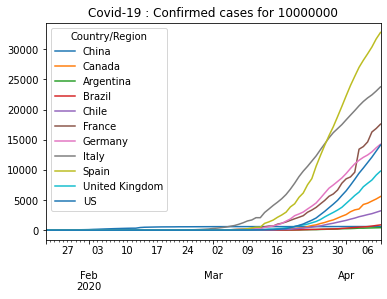

In [28]:
confirmed_norm = normalize_and_timeserie(confirmed,n)
title = "Covid-19 : Confirmed cases for "+str(10**n)
confirmed_norm.plot(title=title)

In [29]:
confirmed_norm.tail()

Country/Region,China,Canada,Argentina,Brazil,Chile,France,Germany,Italy,Spain,United Kingdom,US
2020-04-05,593.094139,4251.615322,326.107707,531.342695,2387.186612,13859.205791,12073.496789,21337.955046,28175.393203,7190.062487,10302.736916
2020-04-06,593.546488,4469.377036,349.256634,580.562311,2570.857422,14631.143804,12465.523976,21933.507518,29251.719506,7761.886475,11207.319614
2020-04-07,593.927035,4822.598949,365.887902,669.978741,2731.569382,16282.055133,12982.720102,22436.392754,30378.983502,8308.443123,12110.710261
2020-04-08,594.580428,5165.027220,385.440880,771.950708,2961.157895,16861.419168,13661.984681,23071.163324,31722.625682,9134.294127,13114.141428
2020-04-09,595.111759,5573.296704,403.420629,863.706383,3188.610701,17577.824220,14251.050448,23766.829508,32793.173339,9787.635370,14104.001561


## Death cases

In [30]:
data = pd.read_csv(path+"time_series_covid19_deaths_global.csv")
data = data.drop(["Lat","Long"],axis=1) 
death = prepare_data(data,pays,to_agregate)
#death.head()
#data.head()
#data[data["Country/Region"] == "United Kingdom"]

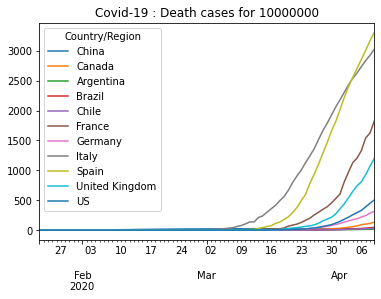

In [31]:
death_norm = normalize_and_timeserie(death,n)
title = "Covid-19 : Death cases for "+str(10**n)
death_norm.plot(title=title) 

In [32]:
death_norm.tail()

Country/Region,China,Canada,Argentina,Brazil,Chile,France,Germany,Italy,Spain,United Kingdom,US
2020-04-05,23.931415,69.888828,9.888862,23.201487,18.153510,1205.901231,191.009248,2628.936407,2705.476395,742.077737,294.008480
2020-04-06,23.945776,91.476110,10.787850,26.925182,19.755291,1330.253264,218.261830,2734.179911,2855.293140,808.103705,329.586593
2020-04-07,23.945776,101.190388,12.585825,32.749424,22.958851,1541.786075,243.102679,2834.128145,3005.965981,926.318765,388.852883
2020-04-08,23.960136,109.825301,14.159053,39.098802,25.628485,1622.547720,283.258032,2923.816792,3165.841851,1067.394751,449.158396
2020-04-09,23.974496,135.730040,16.181775,45.352701,30.433826,1822.735087,314.369387,3024.757889,3306.027519,1199.897890,503.656486


## Rate death/confirmed

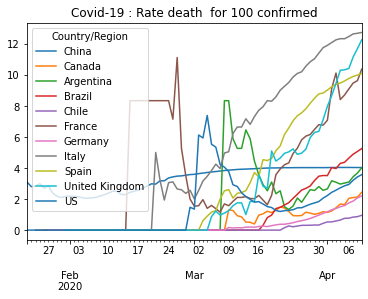

In [33]:
death_rate =  death_norm / confirmed_norm * 100
title = "Covid-19 : Rate death  for 100 confirmed"
death_rate.plot(title = title)

In [34]:
death_rate.tail()

Country/Region,China,Canada,Argentina,Brazil,Chile,France,Germany,Italy,Spain,United Kingdom,US
2020-04-05,4.035011,1.643818,3.032391,4.366577,0.760456,8.701085,1.582054,12.320470,9.602267,10.320880,2.853693
2020-04-06,4.034356,2.046731,3.088803,4.637776,0.768432,9.091929,1.750924,12.465767,9.761112,10.411177,2.940816
2020-04-07,4.031771,2.098254,3.439803,4.888129,0.840500,9.469235,1.872510,12.631835,9.894887,11.149126,3.210818
2020-04-08,4.029755,2.126326,3.673469,5.064935,0.865489,9.622842,2.073330,12.673036,9.979760,11.685575,3.424993
2020-04-09,4.028570,2.435364,4.011142,5.250940,0.954454,10.369515,2.205938,12.726804,10.081450,12.259324,3.571018
